# Case study on Pre-processing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment. 

In [3]:
df=pd.read_csv("titanic_dataset_14d67c21b34d0df656dcfadb5fac52a4.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### There are 891 rows and 12 columns.

### 2. Make ‘PassengerId’ as the index column. 

In [4]:
df.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Now the PassengerId has become the index column.

### 3. Check the basic details of the dataset.

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### The columns Age,Cabin and Embarked have missing values.

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
freqgraph=df.select_dtypes(include=['int32','int64','float'])
freqgraph

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


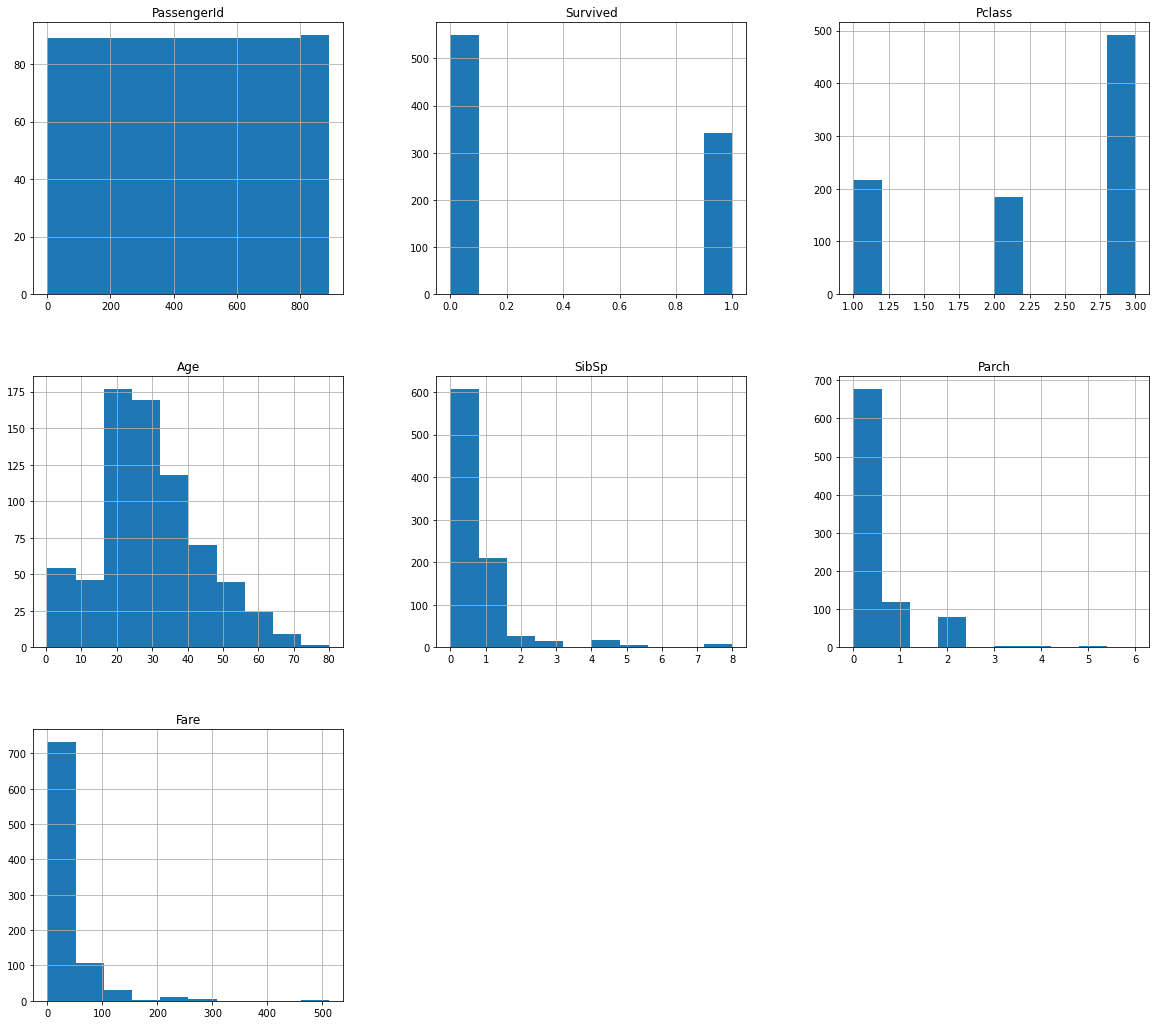

In [11]:
freqgraph.hist(figsize=(20,18))
plt.show()

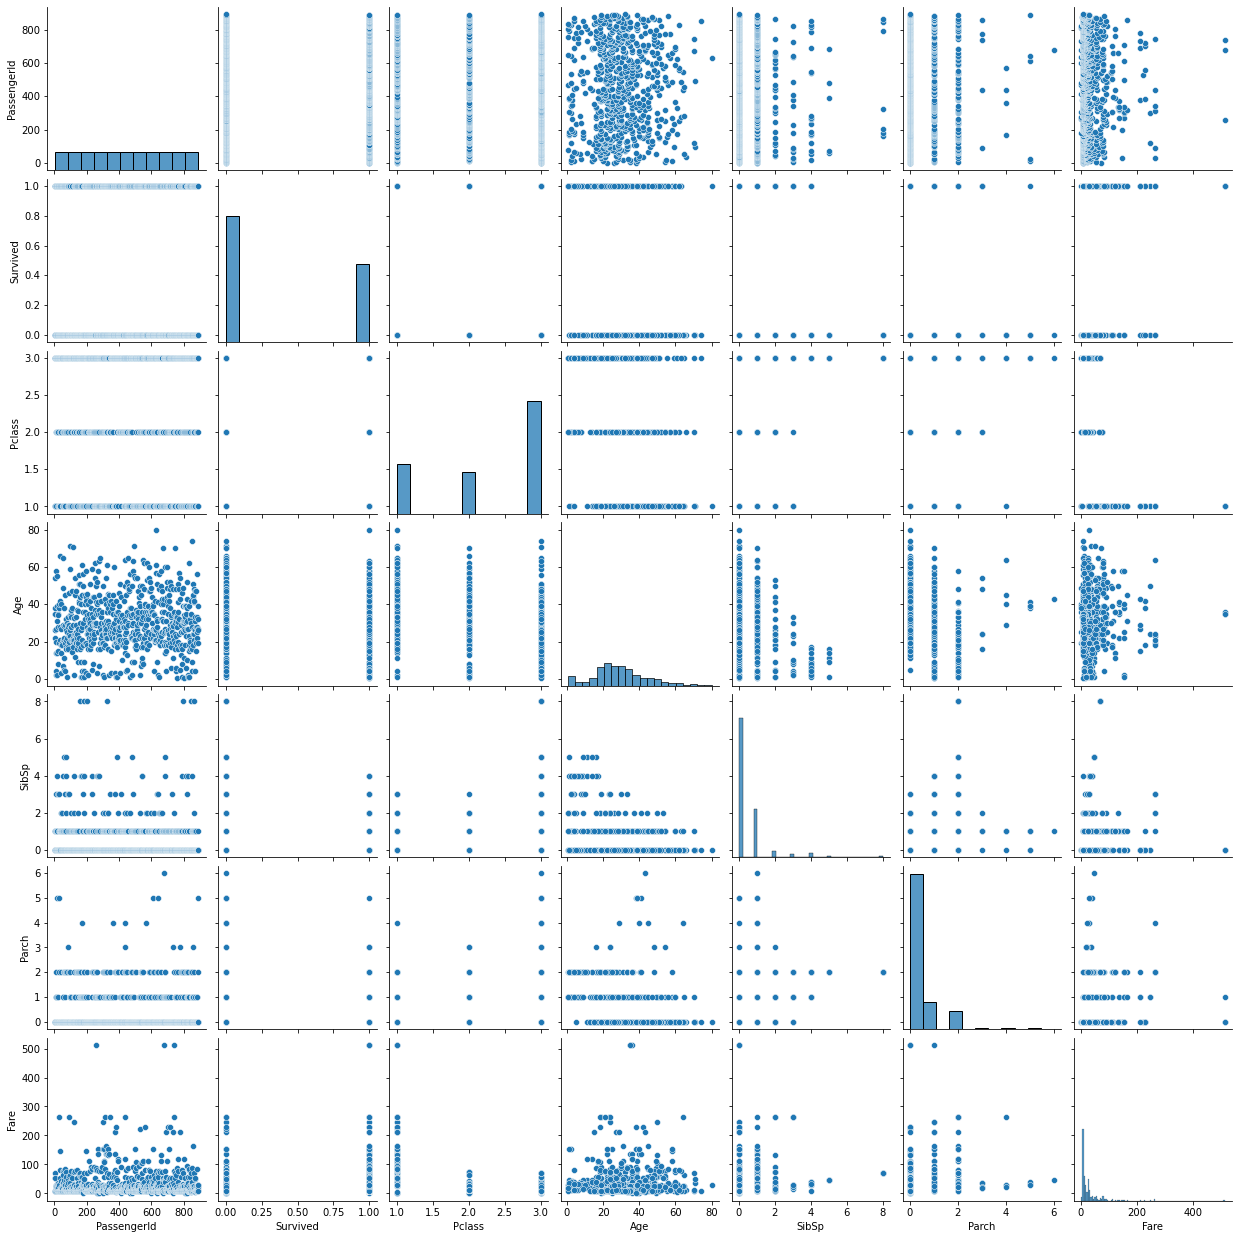

In [14]:
sns.pairplot(df)
plt.show()

### 4. Fill in all the missing values present in all the columns in the dataset. 

#### The columns Age,Cabin and Embarked have missing values.

In [17]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [18]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode())

In [20]:
df['Cabin']

0      B96 B98
1          C85
2           G6
3         C123
4          NaN
        ...   
886        NaN
887        B42
888        NaN
889       C148
890        NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [22]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### 5. Check and handle outliers in at least 3 columns in the dataset.

#### We can check column whether the outliers are present or not.

-  **Pclass**

Text(0.5, 1.0, 'Boxplot of Pclass')

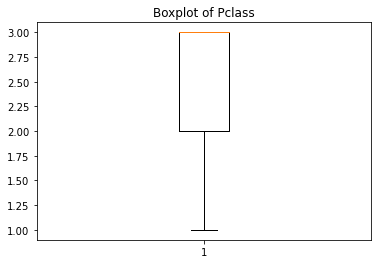

In [23]:
plt.boxplot(df['Pclass'])
plt.title('Boxplot of Pclass')

#### The outliers are not present in this column.

- **SibSp**

Text(0.5, 1.0, 'Boxplot of SibSp')

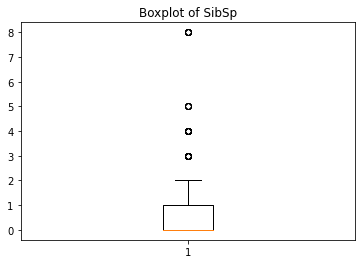

In [24]:
plt.boxplot(df['SibSp'])
plt.title('Boxplot of SibSp')

In [25]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')

In [26]:
print("Q1 :",Q1)
print("Q2 :",Q2)
print("Q3 :",Q3)

Q1 : 0.0
Q2 : 0.0
Q3 : 1.0


In [27]:
df['SibSp'].median()

0.0

In [28]:
IQR=Q3-Q1

In [29]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [30]:
print("lower_limit :",lower_limit)
print("upper_limit :",upper_limit)

lower_limit : -1.5
upper_limit : 2.5


In [31]:
outlier=[]
for x in df['SibSp']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [32]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [33]:
index1=df['SibSp']>upper_limit
df.loc[index1].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [34]:
df.drop([7,16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,792, 813, 819, 824, 846, 850, 863],inplace=True)

Text(0.5, 1.0, 'Boxplot of SibSp')

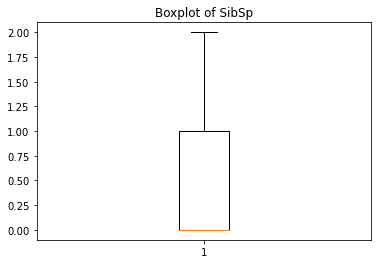

In [35]:
plt.boxplot(df['SibSp'])
plt.title('Boxplot of SibSp')

#### Now the outliers are removed.

- **Fare**

Text(0.5, 1.0, 'Boxplot of Fare')

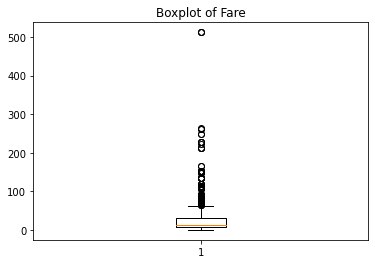

In [36]:
plt.boxplot(df['Fare'])
plt.title('Boxplot of Fare')

In [37]:
Q1=np.percentile(df['Fare'],25,interpolation='midpoint')
Q2=np.percentile(df['Fare'],50,interpolation='midpoint')
Q3=np.percentile(df['Fare'],75,interpolation='midpoint')

In [38]:
print("Q1 :",Q1)
print("Q2 :",Q2)
print("Q3 :",Q3)

Q1 : 7.8958
Q2 : 13.0
Q3 : 30.0


In [39]:
df['Fare'].median()

13.0

In [40]:
IQR=Q3-Q1

In [41]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [42]:
print("lower_limit :",lower_limit)
print("upper_limit :",upper_limit)

lower_limit : -25.2605
upper_limit : 63.1563


In [43]:
outlier=[]
for x in df['Fare']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [44]:
index1=df['Fare'] > upper_limit
df.loc[index1].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  97, 102, 118,
            ...
            765, 779, 789, 802, 820, 829, 835, 849, 856, 879],
           dtype='int64', length=109)

In [45]:
df.drop(df.loc[index1].index,inplace=True)

Text(0.5, 1.0, 'Boxplot of Fare')

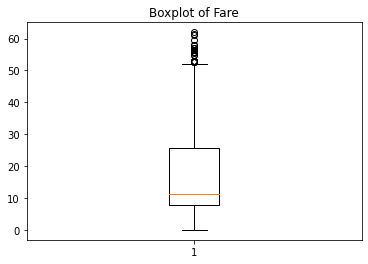

In [46]:
plt.boxplot(df['Fare'])
plt.title('Boxplot of Fare')

#### Now the outliers are removed.

- **Age**

Text(0.5, 1.0, 'Boxplot of Age')

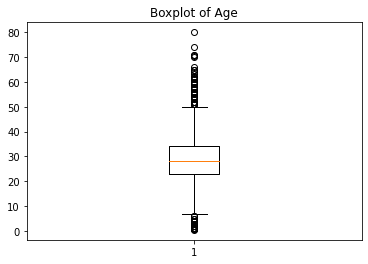

In [47]:
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')

In [48]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')

In [49]:
print("Q1 :",Q1)
print("Q2 :",Q2)
print("Q3 :",Q3)

Q1 : 23.0
Q2 : 28.0
Q3 : 34.25


In [50]:
df['Age'].median()

28.0

In [51]:
IQR=Q3-Q1

In [52]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [53]:
print("lower_limit :",lower_limit)
print("upper_limit :",upper_limit)

lower_limit : 6.125
upper_limit : 51.125


In [54]:
outlier=[]
for x in df['Age']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [55]:
outlier

[54.0,
 4.0,
 58.0,
 55.0,
 66.0,
 3.0,
 65.0,
 5.0,
 0.83,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 1.0,
 56.0,
 1.0,
 4.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 1.0,
 3.0,
 5.0,
 52.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 4.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 70.0,
 60.0,
 4.0,
 60.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 0.67,
 57.0,
 54.0,
 5.0,
 1.0,
 0.42,
 1.0,
 0.83,
 74.0,
 4.0]

In [56]:
index1=df['Age']>upper_limit
df.loc[index1].index

Int64Index([  6,  11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 232, 249,
            252, 280, 317, 326, 449, 456, 467, 483, 487, 492, 493, 513, 545,
            555, 570, 571, 582, 625, 626, 630, 647, 672, 684, 694, 695, 714,
            772, 774, 851],
           dtype='int64')

In [57]:
df.drop([6,  11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 232, 249, 252, 280, 317, 326, 449, 456, 467, 483, 487, 492, 493, 513, 545,555, 570, 571, 582, 625, 626, 630, 647, 672, 684, 694, 695, 714,772, 774, 851],inplace=True)

Text(0.5, 1.0, 'Boxplot of Age')

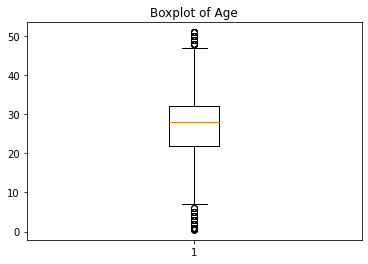

In [58]:
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')

#### Now the outliers are removed.

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target). 

In [59]:
x=df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [60]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
5,6,3,28.0,0,0,8.4583
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,28.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [61]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,451.190202,2.507205,27.761167,0.280980,0.291066,16.509617
std,259.136469,0.714177,9.862148,0.509943,0.760880,12.861588
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.250000,2.000000,22.000000,0.000000,0.000000,7.859400
50%,450.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,674.750000,3.000000,32.000000,1.000000,0.000000,23.250000
max,891.000000,3.000000,51.000000,2.000000,6.000000,61.379200


In [62]:
from sklearn import preprocessing

In [63]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))

In [64]:
x=min_max.fit_transform(x)

In [65]:
x=pd.DataFrame(x)

In [66]:
x.describe()

,0,1,2,3,4,5
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.505832,0.753602,0.540553,0.140490,0.048511,0.268977
std,0.291165,0.357089,0.194981,0.254971,0.126813,0.209543
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247472,0.500000,0.426651,0.000000,0.000000,0.128047
50%,0.504494,1.000000,0.545275,0.000000,0.000000,0.171068
75%,0.757022,1.000000,0.624357,0.500000,0.000000,0.378793
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

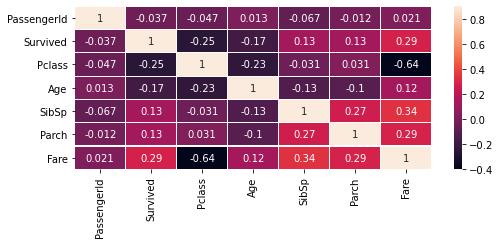

In [67]:
corrmatrix=df.corr()
plt.subplots(figsize=(8,3))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2)

In [68]:
y=df['Survived']
x=df.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=1,test_size=0.25)
x_train,x_test,y_train,y_test

(     PassengerId  Pclass   Age  SibSp  Parch     Fare
 323          324       2  22.0      1      1  29.0000
 175          176       3  18.0      1      1   7.8542
 519          520       3  32.0      0      0   7.8958
 548          549       3  33.0      1      1  20.5250
 639          640       3  28.0      1      0  16.1000
 ..           ...     ...   ...    ...    ...      ...
 187          188       1  45.0      0      0  26.5500
 834          835       3  18.0      0      0   8.3000
 98            99       2  34.0      0      1  23.0000
 308          309       2  30.0      1      0  24.0000
 48            49       3  28.0      2      0  21.6792
 
 [520 rows x 6 columns],
      PassengerId  Pclass   Age  SibSp  Parch     Fare
 853          854       1  16.0      0      1  39.4000
 32            33       3  28.0      0      0   7.7500
 725          726       3  20.0      0      0   8.6625
 722          723       2  34.0      0      0  13.0000
 65            66       3  28.0      1

In [70]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [71]:
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [72]:
print(y_test)

853    1
32     1
725    0
722    0
65     1
      ..
345    1
690    1
83     0
477    0
567    0
Name: Survived, Length: 174, dtype: int64


In [73]:
print(predictions)

[ 0.84711538  0.25236101  0.29142968  0.28033121  0.3193115   0.32286209
  0.27884114  0.67652441  0.24987663  0.20303491  0.29588954  0.15621755
  0.8011664   0.32516511  0.22773097  0.60321524  0.32804119  0.32842581
  0.13578353  0.66786375  0.25033084  0.23072142  0.20763845  0.21347258
  0.3498062   0.49447046  0.40751867  0.21869718  0.20969042  0.62953498
  0.79847975  0.23493668  0.29328662  0.28779825  0.26049894  0.29976841
  0.24870027  0.20709317  0.59090684  0.13330278  0.56862989  0.3481357
  0.61020578  0.22449147  0.35097283  0.13018861  0.72565635  0.91149898
  0.28236556  0.25076399  0.22324298  0.50632814  0.27864336  0.35608755
  0.18848218  0.41889572  0.81146174  0.26917285  0.28256442  0.43876244
  0.42584437  0.93293397  0.50441655  0.24749148  0.70640237  0.40704921
  0.28347755  0.50233933  0.29951173  0.29070963  0.01539133  0.352272
  0.20454345  0.27203212  0.29633636  0.37798637  0.29417058  0.18606436
  0.32905929  0.28091008  0.19868686  0.20080558  0.31

In [74]:
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,predictions))

MSE is 0.2114156979172849


In [75]:
model.intercept_

0.8715169173590123

In [76]:
from sklearn.metrics import r2_score

In [77]:
print('R2 score is',r2_score(y_test,predictions))

R2 score is 0.10201716187658294
